### Notebook collecting statistics about dataset
Here we obtain statistics about our dataset as presented in section 3.2 of thesis.  
Using pandas for csv read and parse.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Read data
antiphons = pd.read_csv('../data/all-ci-antiphons.csv')
responsories = pd.read_csv('../data/all-ci-responsories.csv')


chants = pd.concat([antiphons, responsories])
all_sources = pd.read_csv('../data/sources-of-all-ci-antiphons_OPTIONAL-CENTURY.csv')
used_sources = pd.read_csv('../data/sources-with-provenance-ids-and-two-centuries.csv')

feasts = pd.read_csv('../data/feast.csv')

geography = pd.read_csv('../data/geography_data.csv')

In [29]:
print('All antiphons records:', len(antiphons))
print('All responsories records:', len(responsories))
print()
antiphons_of_used_s = antiphons[antiphons['source_id'].isin(used_sources['drupal_path'])]
responsories_of_used_s = responsories[responsories['source_id'].isin(used_sources['drupal_path'])]
print('Antiphons records after bigger sources selection:', len(antiphons_of_used_s))
print('Responsories records after bigger sources selection:', len(responsories_of_used_s))

All antiphons records: 265621
All responsories records: 124195

Antiphons records after bigger sources selection: 242086
Responsories records after bigger sources selection: 120546


In [30]:
chants_of_used_s = pd.concat((antiphons_of_used_s, responsories_of_used_s))
print('Number of CIDs in antiphons and responsories of used sources:', len(chants_of_used_s['cantus_id'].value_counts()))

Number of CIDs in antiphons and responsories of used sources: 17599


In [31]:
print('All sources:', len(all_sources))
print('All sources with known cursus:', len(all_sources.dropna(subset="cursus")))
print('All sources with more then 100 chants:', len(used_sources))
print('All sources with more than 100 chants and geography info:', len(used_sources) - used_sources['provenance_id'].isnull().sum())

All sources: 816
All sources with known cursus: 244
All sources with more then 100 chants: 250
All sources with more than 100 chants and geography info: 233


In [32]:
freq_of_feasts = chants['feast_id'].value_counts()
print('Number of feasts we have office antiphons or responsories for:', len(freq_of_feasts))

bigger_feasts = freq_of_feasts.drop(freq_of_feasts[freq_of_feasts.values < 5].index).index.tolist()
feasts_without_fragments = feasts[feasts['id'].isin(bigger_feasts)]
print('Number of feasts we have at least 5 office antiphons or responsories for:', len(feasts_without_fragments))

antiphons_of_used_s_f = antiphons_of_used_s[antiphons_of_used_s['feast_id'].isin(feasts_without_fragments['id'])]
responsories_of_used_s_f = responsories_of_used_s[responsories_of_used_s['feast_id'].isin(feasts_without_fragments['id'])]
print('Antiphons records after bigger sources and feasts selection:', len(antiphons_of_used_s_f))
print('responsories records after bigger sources and feasts selection:', len(responsories_of_used_s_f))

Number of feasts we have office antiphons or responsories for: 1309
Number of feasts we have at least 5 office antiphons or responsories for: 1029
Antiphons records after bigger sources and feasts selection: 234355
responsories records after bigger sources and feasts selection: 116252


In [33]:
print('Number of geography places:', len(geography))

Number of geography places: 122


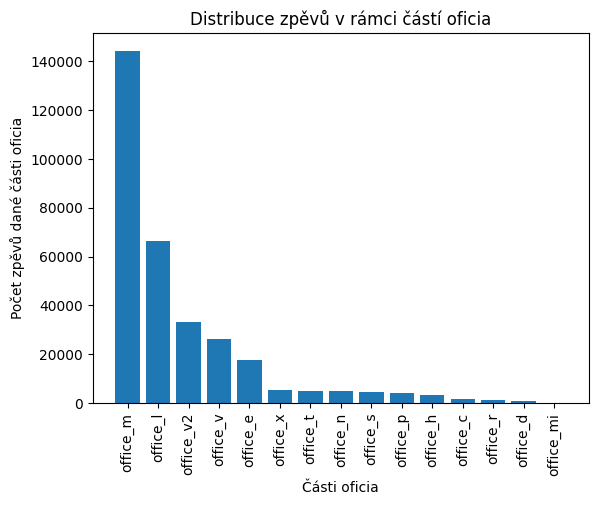

In [34]:
# Plot of office distribution
filtered_chants = pd.concat([antiphons_of_used_s_f, responsories_of_used_s_f])
office_distr = filtered_chants['office_id'].value_counts().to_dict()
plt.bar(x=office_distr.keys(), height=office_distr.values())
plt.xticks(rotation='vertical')
plt.xlabel('Části oficia')
plt.ylabel('Počet zpěvů dané části oficia')
plt.title('Distribuce zpěvů v rámci částí oficia')
plt.savefig(fname="office_dist.pdf", format="pdf")
plt.show()


In [35]:
print('Number of Cantus IDs of final chants:', len(filtered_chants['cantus_id'].value_counts()))

Number of Cantus IDs of final chants: 17144


In [36]:
# Get 10 feasts with most data
biggest_feasts = chants['feast_id'].value_counts()[:10].to_dict()

for feast_id in biggest_feasts.keys():
    print(feasts[feasts['id'] == feast_id]['name'].values[0])

Nativitas Domini
Purificatio Mariae
Epiphania
Assumptio Mariae
Comm. Apostolorum
Comm. plurimorum Martyrum
Omnium Sanctorum
Fer. 5 in Cena Dom.
Dom. in Palmis
Joannis Baptistae


In [37]:
biggest_feasts_czech_names = ["Narození Páně", "Uvedení Páně do chrámu", "Tři králové", "Nanebevzetí Panny Marie", 
                              "Společné zpěvy k apoštolům", "Společné zpěvy k mučedníkům", "Svátek všech svatých",
                              "Zelený čtvrtek", "Květná neděle", "Jan Křtitel"]

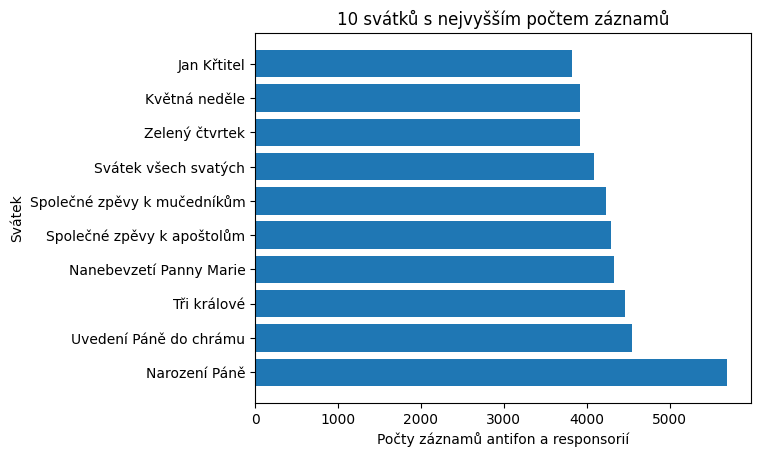

In [38]:

plt.barh(biggest_feasts_czech_names, biggest_feasts.values())
plt.xlabel('Počty záznamů antifon a responsorií')
plt.ylabel('Svátek')
plt.title('10 svátků s nejvyšším počtem záznamů')
plt.show()

In [39]:
# Transform chant data into document like structure
feast_chants_dict = {}
for feast_id in feasts['id'].tolist():
    filt_source = chants['feast_id'] == feast_id
    feast_chants_dict[feast_id] = len(set(chants[filt_source]['cantus_id'].tolist()))

In [40]:
# Find top 10
top_ci = dict(sorted(feast_chants_dict.items(), key=lambda item: item[1], reverse=True))

In [41]:
for feast_id in list(top_ci.keys())[:10]:
    print(feast_id, feasts[feasts['id'] == feast_id]['name'].values[0])

feast_1115 Mariae Magdalenae
feast_0500 Dom. per annum
feast_0022 Additamenta
feast_1283 Omnium Sanctorum
feast_0093 Assumptio Mariae
feast_1821 XI milium Virginum
feast_0067 Annuntiatio Mariae
feast_0360 Decoll. Jo. Bapt.
feast_1204 Nativitas Mariae
feast_0281 Conceptio Mariae


In [42]:
ci_feasts_czech_names = ["Marie Magdalena", "Oficium běžné neděle", "Různé", "Svátek všech svatých",
                         "Nanebevzetí Panny Marie", "Jedenáct tisíc panen (sv. Voršila)", "Zvěstování Panny Marie", 
                         "Stětí Jana Křtitele", "Narození Páně", "Početí Panny Marie"]

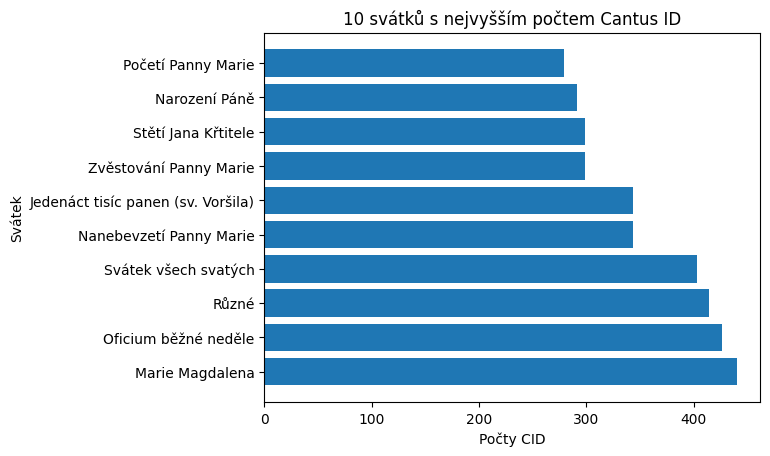

In [43]:
plt.barh(ci_feasts_czech_names, list(top_ci.values())[:10])
plt.xlabel('Počty CID')
plt.ylabel('Svátek')
plt.title('10 svátků s nejvyšším počtem Cantus ID')
plt.show()

### Czech sources
Specific statistics about six Czech sources used for evaluation based on musicology knowledge.  
Sanity check on amout of data and their shared parts.

In [44]:
six_czech_sources = {"http://cantusbohemiae.cz/source/33177" : "CZ-Pn XII A 24", 
                      "http://cantusbohemiae.cz/source/4478" : "CZ-Pu Pu XIV A 19", 
                      "http://cantusbohemiae.cz/source/28509" : "CZ-Pn XV A 10",
                      "http://cantusdatabase.org/source/123730" : "CZ-Pu XIV B 13", 
                      "http://cantusdatabase.org/source/123727" : "CZ-Pu VI.E.4c", 
                      "http://cantusbohemiae.cz/source/28488" : "CZ-Pu VI G 11"}

In [45]:
print('Prague cathedral data \n------------')
cathedral_used_chants = {}
cathedral_used_feasts = {}
cathedral_shared_chants = []
cathedral_shared_feasts = []

i = 0
for sI in list(six_czech_sources.keys())[:3]:
    print('Number of records of', six_czech_sources[sI], ':', len(chants_of_used_s[chants_of_used_s['source_id'] == sI]))
    print('Number of cantus_ids of', six_czech_sources[sI], ':', len(set(chants_of_used_s[chants_of_used_s['source_id'] == sI]['cantus_id'].tolist())))
    print('Number of feasts in', six_czech_sources[sI], ':', len(set(chants_of_used_s[chants_of_used_s['source_id'] == sI]['feast_id'].tolist())))
    print()

    cathedral_used_chants[sI] = chants_of_used_s[chants_of_used_s['source_id'] == sI]['cantus_id'].tolist()
    cathedral_used_feasts[sI] = chants_of_used_s[chants_of_used_s['source_id'] == sI]['feast_id'].dropna().tolist()
    if i == 0:
        cathedral_shared_chants = cathedral_used_chants[sI]
        cathedral_shared_feasts = cathedral_used_feasts[sI]
    else:
        cathedral_shared_chants = set(cathedral_shared_chants).intersection(set(cathedral_used_chants[sI]))
        cathedral_shared_feasts = set(cathedral_shared_feasts).intersection(set(cathedral_used_feasts[sI]))
    i += 1

print('Cathedral shared cantus_ids:', len(cathedral_shared_chants))
print('Cathedral shared feasts:', len(cathedral_shared_feasts))


Prague cathedral data 
------------
Number of records of CZ-Pn XII A 24 : 582
Number of cantus_ids of CZ-Pn XII A 24 : 543
Number of feasts in CZ-Pn XII A 24 : 55

Number of records of CZ-Pu Pu XIV A 19 : 988
Number of cantus_ids of CZ-Pu Pu XIV A 19 : 853
Number of feasts in CZ-Pu Pu XIV A 19 : 98

Number of records of CZ-Pn XV A 10 : 1741
Number of cantus_ids of CZ-Pn XV A 10 : 1298
Number of feasts in CZ-Pn XV A 10 : 159

Cathedral shared cantus_ids: 437
Cathedral shared feasts: 44


In [46]:
print('St. George monastery data  \n------------')
monastery_used_chants = {}
monastery_used_feasts = {}
monastery_shared_chants = []
monastery_shared_feasts = []

i = 0
for sI in list(six_czech_sources.keys())[3:]:
    print('Number of records of', six_czech_sources[sI], ':', len(chants_of_used_s[chants_of_used_s['source_id'] == sI]))
    print('Number of cantus_ids of', six_czech_sources[sI], ':', len(set(chants_of_used_s[chants_of_used_s['source_id'] == sI]['cantus_id'].tolist())))
    print('Number of feasts in', six_czech_sources[sI], ':', len(set(chants_of_used_s[chants_of_used_s['source_id'] == sI]['feast_id'].tolist())))
    print()

    monastery_used_chants[sI] = chants_of_used_s[chants_of_used_s['source_id'] == sI]['cantus_id'].tolist()
    monastery_used_feasts[sI] = chants_of_used_s[chants_of_used_s['source_id'] == sI]['feast_id'].dropna().tolist()
    if i == 0:
        monastery_shared_chants = monastery_used_chants[sI]
        monastery_shared_feasts = monastery_used_feasts[sI]
    else:
        monastery_shared_chants = set(monastery_shared_chants).intersection(set(monastery_used_chants[sI]))
        monastery_shared_feasts = set(monastery_shared_feasts).intersection(set(monastery_used_feasts[sI]))
    i += 1

print()
print('Monastery shared cantus_ids:', len(monastery_shared_chants))
print('Monastery shared feasts:', len(monastery_shared_feasts))


St. George monastery data  
------------
Number of records of CZ-Pu XIV B 13 : 1403
Number of cantus_ids of CZ-Pu XIV B 13 : 1347
Number of feasts in CZ-Pu XIV B 13 : 127

Number of records of CZ-Pu VI.E.4c : 2327
Number of cantus_ids of CZ-Pu VI.E.4c : 1667
Number of feasts in CZ-Pu VI.E.4c : 151

Number of records of CZ-Pu VI G 11 : 2616
Number of cantus_ids of CZ-Pu VI G 11 : 1842
Number of feasts in CZ-Pu VI G 11 : 362


Monastery shared cantus_ids: 712
Monastery shared feasts: 104


In [47]:
print('Monastery and cathedral together \n -------')

monastery_used_chants.update(cathedral_used_chants)
together_chants = monastery_used_chants
monastery_used_feasts.update(cathedral_used_feasts)
together_feasts = monastery_used_feasts
together_shared_chants = []
together_shared_feasts = []

i = 0
for sI in list(six_czech_sources.keys()):
    if i == 0:
        together_shared_chants = together_chants[sI]
        together_shared_feasts = together_feasts[sI]
    else:
        together_shared_chants = set(together_shared_chants).intersection(set(together_chants[sI]))
        together_shared_feasts = set(together_shared_feasts).intersection(set(together_feasts[sI]))
    i += 1
   
print('All six shared cantus_ids:', len(together_shared_chants))
print('All six shared feasts:', len(together_shared_feasts))

Monastery and cathedral together 
 -------
All six shared cantus_ids: 204
All six shared feasts: 37
